# Week 1

## Why sequence models

* "RNNs have transformed speech recognition, NLP and other areas."
* Examples:
  * Speech recognition: given some audio input, output sequence of words.
  * Music generation: given an empty set, or a single integer to represent genre or some first notes, generate output music.
  * Sentiment classification: Given some text, output the sentiment.
  * DNA sequence analysis
  * Machine translation.
  * Video activity recognition.
  * Name entity recognition.

## Notation

* Motivation: Find people's names in sentence (named entity recognition).
    * x: "Harry Potter and Hermione Granger invented a new spell.
    * y: ```[1 1 0 1 1 0 0 0 0]```
    * Input (x):
      * Sequence of 9 words, with each word denoted as $x^{<t>}$ up to $x^{<Tx>}$.
      * $Tx$ = number of words in a single training example (9 in this example).
      * $ x^{<1>} x^{<2>} .. x^{<9>} $
      * $X^{(i)<t>}$ is a single char within a single training example (sentence).
      * Denote $T_x = 9$ as num input words.
    
      * Denote as $y^{<t>}$ with each output denoted as $y^{<t>}$ up to $y^{<Ty>}$.
      * $T_y$ = number output digits (9 in this example).
      * $y^{(i)<t>}$ is output digit $t$.
      
* Representing words: build a vocabulary or dictionary of words to digits.
  * ```[a, aaron, and, ..., harry, potter, ..., zulu]```
  * Dictionary sizes of 30k to 50k are common, some could even go up to 1M words.
  * Each word is represented as a 10k one hot encoded word vector.

## Recurrent Neural Network Model

* Re named entity recognition problem, why not a standard neural network?

    * Inputs, outputs can be different length in different examples - standard NN needs consistent input and output.
    * Doesn't share features learned across different *positions* of text.
      * Eg doesn't learn that Harry in position 1 may be a person's name.
      
* RNN:

  * Steps:

      1. Take first word, $x^{<1>}$, and feed into neural network layer and predict output, $y^{<1>}$.
      2. When it reads the second word, $x^{<2>}$, it predicts output using the activation from the last step, $a^{<1>}$ and the second word, to output $y^{<2>}$.
  
  * Parameters:
    * Parameters are $Waa$, which governs the activation parameters, and $Wya$, which governs the output predictions and $Wax$ for the inputs:
    
  * Predictions:
      * 
    
    $a^{<t>} = g(W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a)$
    $\hat{y} = g(W_{ya}a^{<t>} + b_{y})$
  
  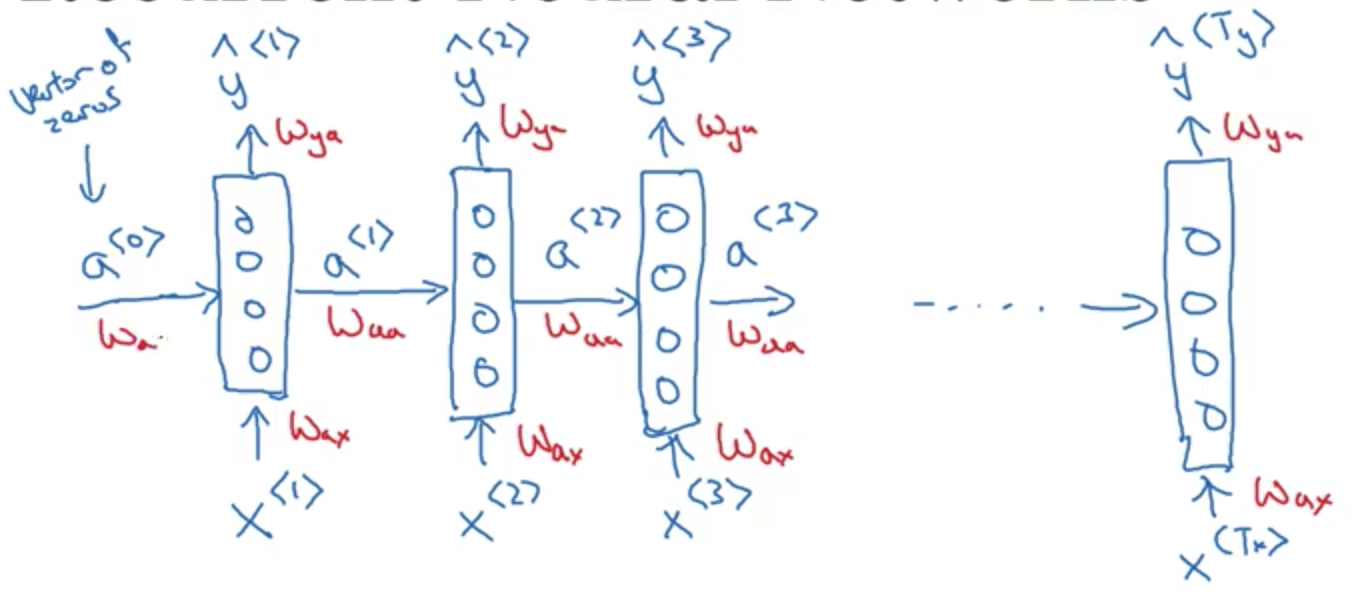
  
  * This RNN describes a unidirectional architecture because it only goes one way through the network.
    
* Forward propagation:

    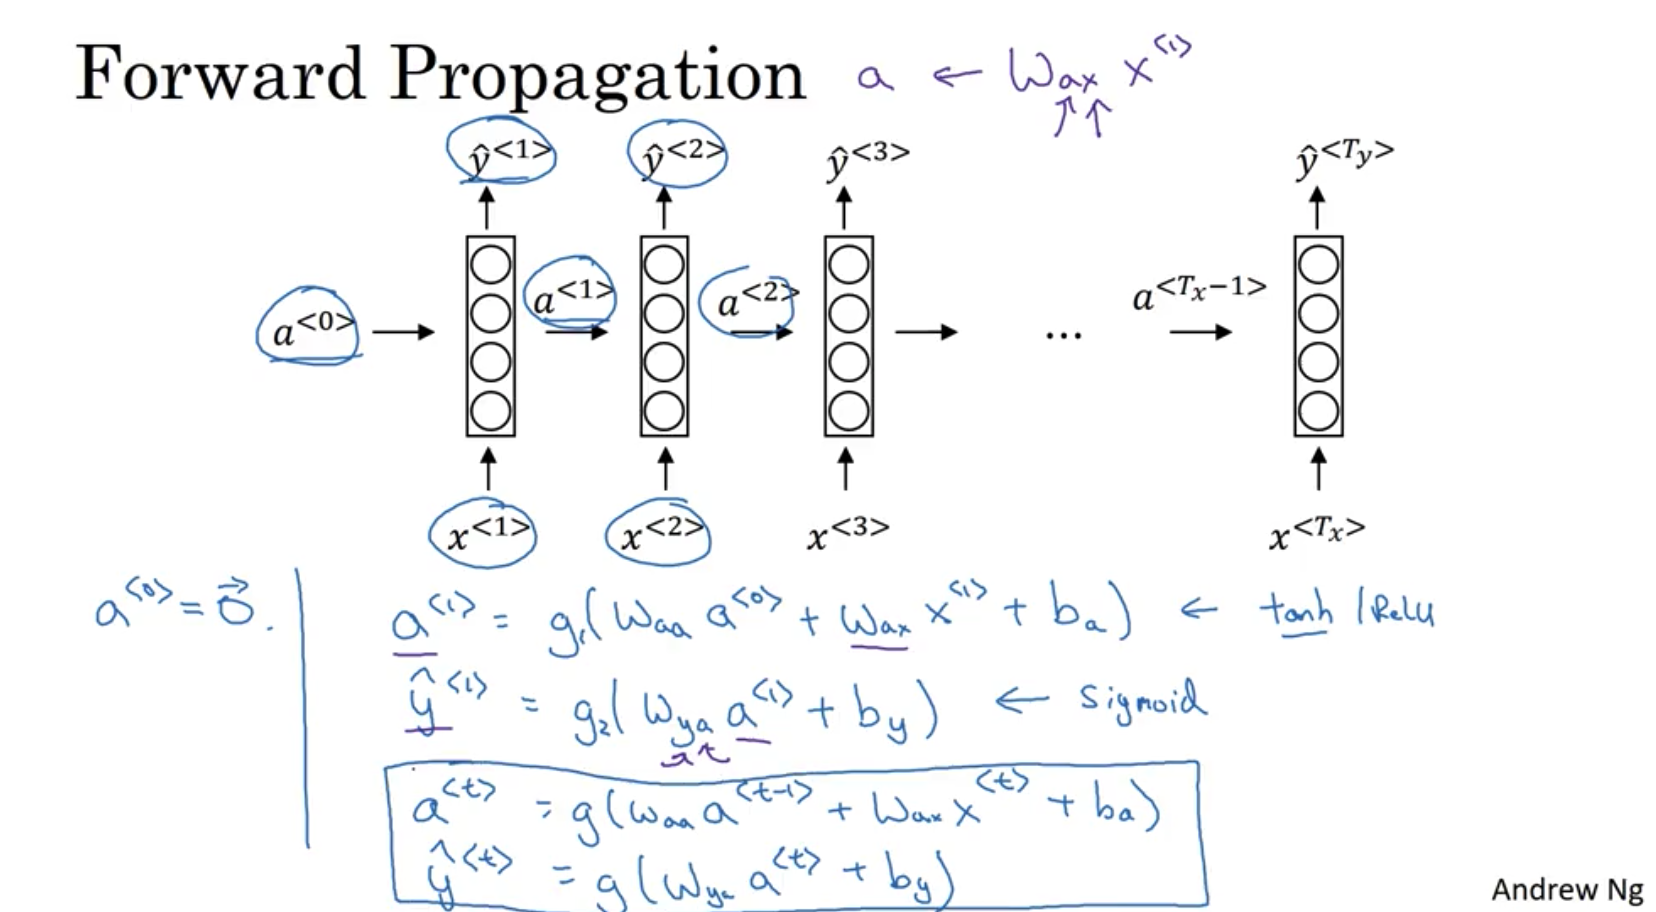

* Notation:

  * Activation param is calculated by multiplying the activation weights and previous a, then adding the input weights times the input then adding the activation bias and applying an activation function:

      $a^{<t>} = g(W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a)$
      
      * Activation function is often `tanh`.    
      
  * Prediction is calculated by multiplying the output weights with the activations and adding a bias term:
  
      $\hat{y} = g(W_{ya}a^{<t>} + b_{y})$
     
      * Activation function is often `softmax` (if multiclass) or `sigmoid` (if binary).
  
* Simplified notation:

  * Input:
  
      $a^{<t>} = g(W_a[a^{<t-1>}, x^{(t)}] + ba)$
      
      * Notation means to take 2 vectors and stack.
        
  * Output:
  
      $\hat{y}^{<t>} = g(W_{y}a^{<t>} + by)$

### Backpropagation through time

* Loss function for a single input: $L^{<t>}(\hat{y}^{<t>}, y^{<t>}) = -y^{<t>}\log \hat{y}^{<t>} - (1 - y^{<t>}) \log (1 - \hat{y}^{<t>})$
* Loss for whole training example: $L(\hat{y}, y) = \sum\limits^{Ty}_{t=1} L^{<t>}(\hat{y}^{<t>}, y^{<t>})$

* Back propagation performs calculations in the opposite direction of forward propagation.

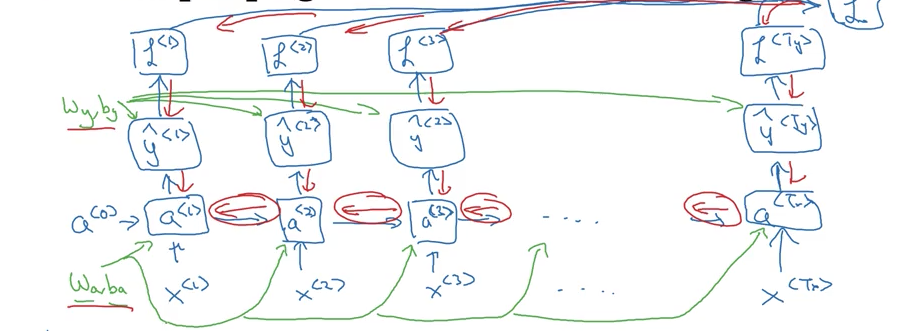

### Different types of RNN

* Tx does not always equal Ty in RNNs.
  * Speech recognition.
  * Music generation.

* One-to-one
  * Standard neural network.

* One-to-many
  * Music generation.
  * Input a single genre (or some other input including null) and output notes.

* Many-to-one
  * Sentiment classifier
  * Inputs many words and outputs a single number.
 
* Many-to-many
  * Named entity recognition.

### Language model and sequence generation

* How could speech recognition differentiate between: "the apple and pair salad" and "the apple and pear salad"?

  * Answer: language model.
  * P(the apple and pair salad) = 3.2 * 10^-13
  * P(the apple and pear salad) = 5.7 * 10^-10
  * P(sentence) = ?
  
* To build with RNN:

  1. Get a large corpus of English text and tokenize (Extra token for end of a sentence?)
  2. Attempt to predict the first word (using just probability), then predict the 2nd word using the first word and so on.
  
* Model can predict the probability of the next current word given the words before it:

  $P(y^{<3>}|y^{<1>},y^{<2>})$

### Sampling novel sequences

* After training sequence model, can get an idea of what it's learned by generating random sentences.
  * At first time step, take a word according to distribution of softmax output (basically, randomly pick a likely word).
  * Input that word to the next step to get another prediction.
  * Keep repeating until you can an EOS token.
  * May want to reject any unknown word tokens: keep sampling until you get an actual word.

* Character-level language model:
  * Use each character rather than each word from training dataset to build model.
  * Can handle all words in input: no words are assigned 0 probability.
  * Harder to train and more computationally expense.
  * Used in more specialised applications.

###  Vanishing gradients with RNN

* Gradients need to learn very long-term dependancies. The "was" or "were" in the following sentences are depends on the plurality of "cat", so you need to remember you said "cat" for a while.
  * The cat, which already ate .. ..., was full.
  * The cats, ..., were full.
    
* Points in sequences are heavily influenced by points nearby - hard to learn long term with RNNs (solution to come). 
* Gradients decrease exponentially but can also increase, ala CNNs, but less of a problems in RNNs.

### Gated Recurrent Unit (GRU)

* Revisit formula for computing activations:

    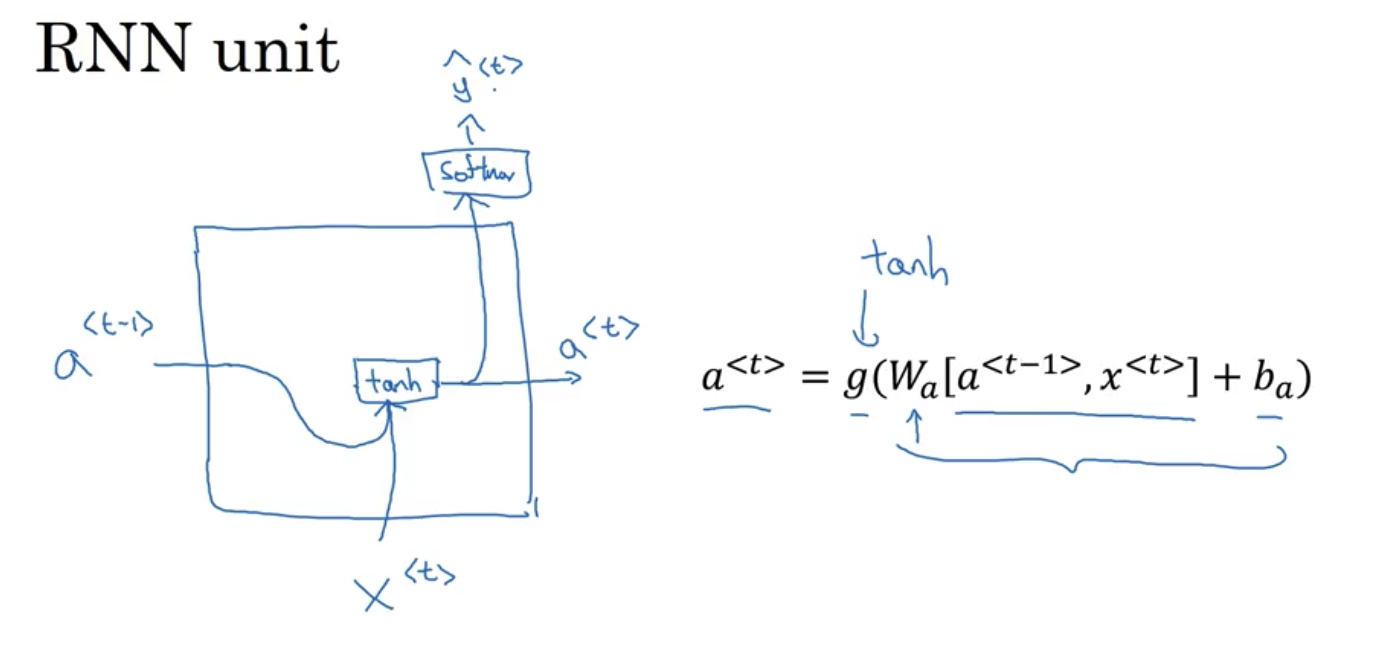
    
 * GRU (simplified):
 
     $C = \text{memory cell}\\C^{<t>} = a^{<t>}\\c^{<t>} = tanh(W_c[c^{<t-1>}, x^{<t>}] + bw)
     $
     